# INFORMATIONS PERSONNELLES

#### Nom : NGUAZONG TSAFACK Aurel B
#### Matricule : 20P001
#### Filière : AIA 
#### Niveau : 4

# CC de Réseau de neuronnes et Deeplearning II

## Partie I : CONNAISSANCE DES DONNEES ET PRETRAITEMENTS

In [45]:
# 1-) importations des modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [14]:
# 2-) Importation du jeux de données

df = pd.read_csv("billets.csv",sep = ";")


In [15]:
# 3-) Affichage des premières et dernières lignes des données
# Premières lignes

df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [16]:
#dernières lignes
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [17]:
# 4-) Calcul du nombre de ligne et de colonne de la dataframe

df.shape

(1500, 7)

In [28]:
# 5-) Calculer les informations statistiques des nos variables

df.describe(include = "all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


In [51]:
# mode_values = df.mode().iloc[0,]

Notre jeu de données compte beaucoup de valeurs manquante

In [26]:
# 6-) Afficher une grève d'information sur les données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


La colonnes d'où il manque des données est celle nommées 'margin_low'

In [27]:
# 7-) Calculer et afficher le nombres de valeurs manquantes par colonne

df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [35]:
# 8-) Remplacer les valeurs manquantes pour cette colonne

df1 = df
df2 = df

In [42]:
# calulons la médiane des données et remplaçons dans le dataset
median = df1["margin_low"].median()
median

4.31

In [32]:
df1["margin_low"].fillna(median, inplace = True)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [52]:
# divisons les données

train_data = df2.dropna(subset=['margin_low'])
test_data = df2[df2['margin_low'].isnull()]

#Variable indépendantes (X) et dépendante (Y) pour l'ensemble de l'entraînement

X = train_data[['diagonal','height_left','height_right','margin_up','length']]
y = test_data['margin_low']

# Entraîmenent du modèle de régression linéaire

model = LinearRegression()
model.fit(X,y) 

# Variable indépendantes pour l'ensemble du test

x_test = test_data[['diagonal','height_left','height_right','margin_up','length']]

# Prédiction des valeurs manquantes

predict_value = model.predict(x_test)

# Remplacement des valeurs manquantes dans l'ensemble de données initial

# data.loc[df2['margin_low'].isnull(), 'margin_low'] = predict_value
test_data['margin_low'] = predict_value

# combiner les deux ensembles de données
new_df = pd.concat([train_data,test_data])

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required by LinearRegression.

# Partie II: ANALYSE, EXPLORATION DES DONEES

## I- ANNALYSE UNIVARIEE

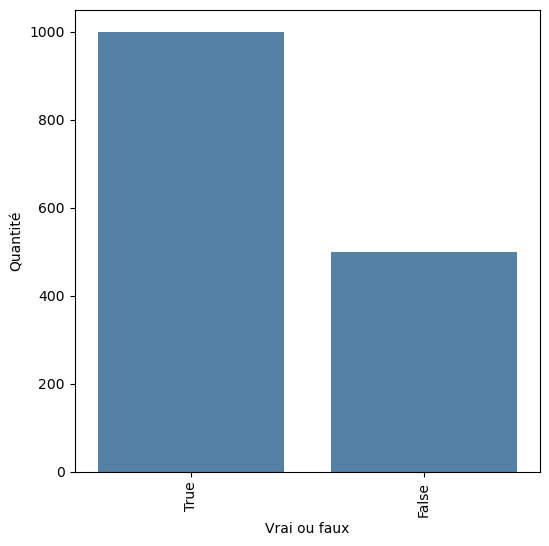

In [60]:
# 1-) Représenter l'histogramme du nombre de billet pour chaque type

plt.figure(figsize=(6,6))
order = df['is_genuine'].value_counts().index
sns.countplot(data=df1, x='is_genuine', order = order, color='steelblue')
plt.xlabel('Vrai ou faux')
plt.xticks(rotation = 90)
plt.ylabel('Quantité')
plt.show()

Nous remarquons une grande difference entre les vrais billets et les faux billets où ils y'a plus de vrai billets que de faux billets

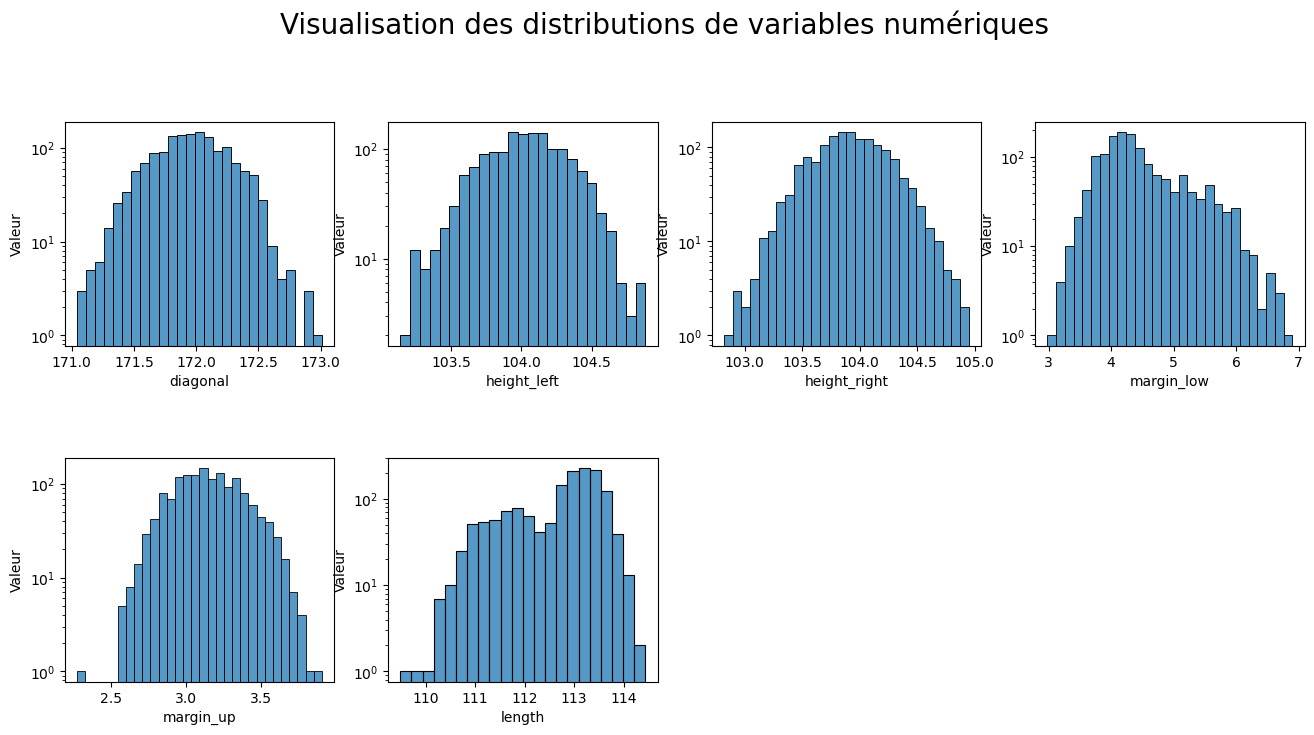

In [62]:
# 2-) Représenter les histogrammes de distribution des autres variables

plt.figure(figsize=(16, 16))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Visualisation des distributions de variables numériques", fontsize=20, y=0.95)
variables_log = ['diagonal','height_left','height_right','margin_low','margin_up','length']

for n, ticker in enumerate(variables_log):
    ax = plt.subplot(4, 4, n + 1)
    ax = sns.histplot(data=df, x=ticker)

    ax.set_ylabel("Valeur")
    if ticker in variables_log:
        ax.set_yscale('log')


## II. ANALYSE BIVARIEE

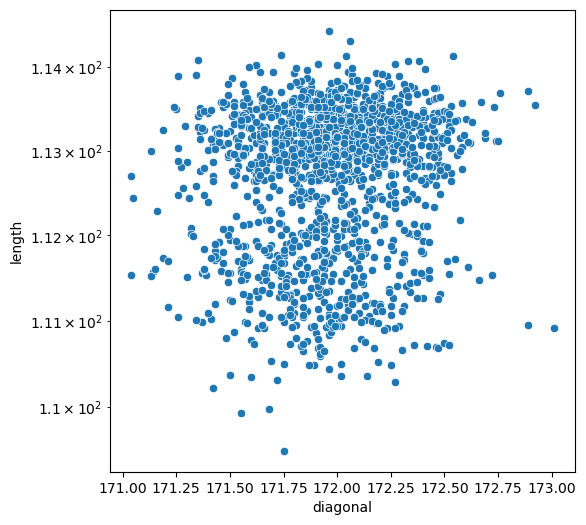

In [65]:
# 1-) Représentation des nuages de points pour chaque couple de variable

# diagonal vs length
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
sns.scatterplot(data=df, x="diagonal", y="length")
plt.xlabel("diagonal")
plt.ylabel("length")
ax.set_yscale('log')
plt.show()